In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.paths import DATA_DIR

In [4]:
data = pd.DataFrame(columns=["title", "price", "rating", "state", "year_month", "day"])

for file_path in DATA_DIR.glob('*.csv'):
    with open(file_path, 'rb'):
        tmp = pd.read_csv(file_path)
        data = pd.concat([data, tmp])


In [5]:
data.head()

,title,price,rating,state,year_month,day
0,Kelly Inn and Suites Mitchell,£110,Scored 7.9\n7.9,Tennessee,2025-1,15
1,Comfort Suites University Brookings,£82,Scored 8.7\n8.7,Tennessee,2025-1,15
2,King's Inn of Platte,£78,Scored 8.1\n8.1,Tennessee,2025-1,15
3,Stay USA Hotel and Suites,£56,Scored 7.0\n7.0,Tennessee,2025-1,15
4,Baymont by Wyndham Oacoma,£81,Scored 8.2\n8.2,Tennessee,2025-1,15


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 135937 entries, 0 to 101
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   title       135937 non-null  object
 1   price       135937 non-null  object
 2   rating      135937 non-null  object
 3   state       135937 non-null  object
 4   year_month  135937 non-null  object
 5   day         135937 non-null  object
dtypes: object(6)
memory usage: 7.3+ MB


In [7]:
data_clean = data.copy()

# Tidying columns
data_clean['price'] = data_clean['price'].str.split('£').str[-1].str.replace(',', '').astype(np.float32)
data_clean["rating"] = data_clean["rating"].str.split("\n").str[-1].astype(np.float32)
data_clean["day_of_week"] = pd.to_datetime(
    data_clean["year_month"].astype(str) + "-" + data_clean["day"].astype(str)
).dt.day_of_week

# Removing one erroneous record after validation
data_clean = data_clean[data_clean["day_of_week"].isin([2, 5])].copy()

In [8]:
data_clean.head()

,title,price,rating,state,year_month,day,day_of_week
0,Kelly Inn and Suites Mitchell,110.0,7.9,Tennessee,2025-1,15,2
1,Comfort Suites University Brookings,82.0,8.7,Tennessee,2025-1,15,2
2,King's Inn of Platte,78.0,8.1,Tennessee,2025-1,15,2
3,Stay USA Hotel and Suites,56.0,7.0,Tennessee,2025-1,15,2
4,Baymont by Wyndham Oacoma,81.0,8.2,Tennessee,2025-1,15,2


The prices for each state are right-skewed towards higher prices, in some cases, e.g. Texas, quite extremely. 

/var/folders/wb/5h7cs7g51ts3ndjm9x6xjjcr0000gn/T/ipykernel_58677/2543874751.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data_clean['state'], y=data_clean['price'], order=grouped.index, palette='coolwarm')


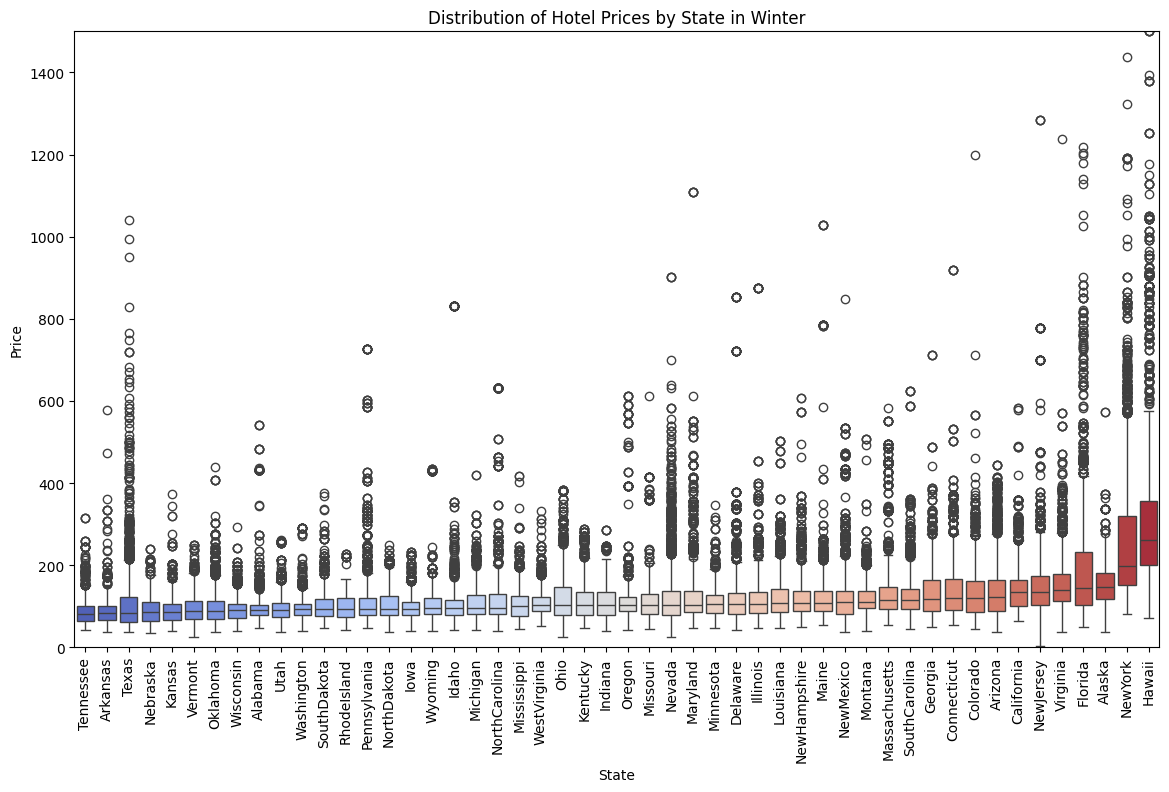

In [9]:
grouped = (
    data_clean.loc[:, ["state", "price"]]
    .groupby(["state"])
    .median()
    .sort_values(by="price")
)

plt.figure(figsize=(14, 8))
sns.boxplot(x=data_clean['state'], y=data_clean['price'], order=grouped.index, palette='coolwarm')
plt.xticks(rotation=90)
plt.ylim([0, 1500])
plt.title("Distribution of Hotel Prices by State in Winter")
plt.ylabel("Price")
plt.xlabel("State")
plt.show()

/var/folders/wb/5h7cs7g51ts3ndjm9x6xjjcr0000gn/T/ipykernel_58677/1963706509.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="state", y="price", data=avg_price_by_state, palette="coolwarm")


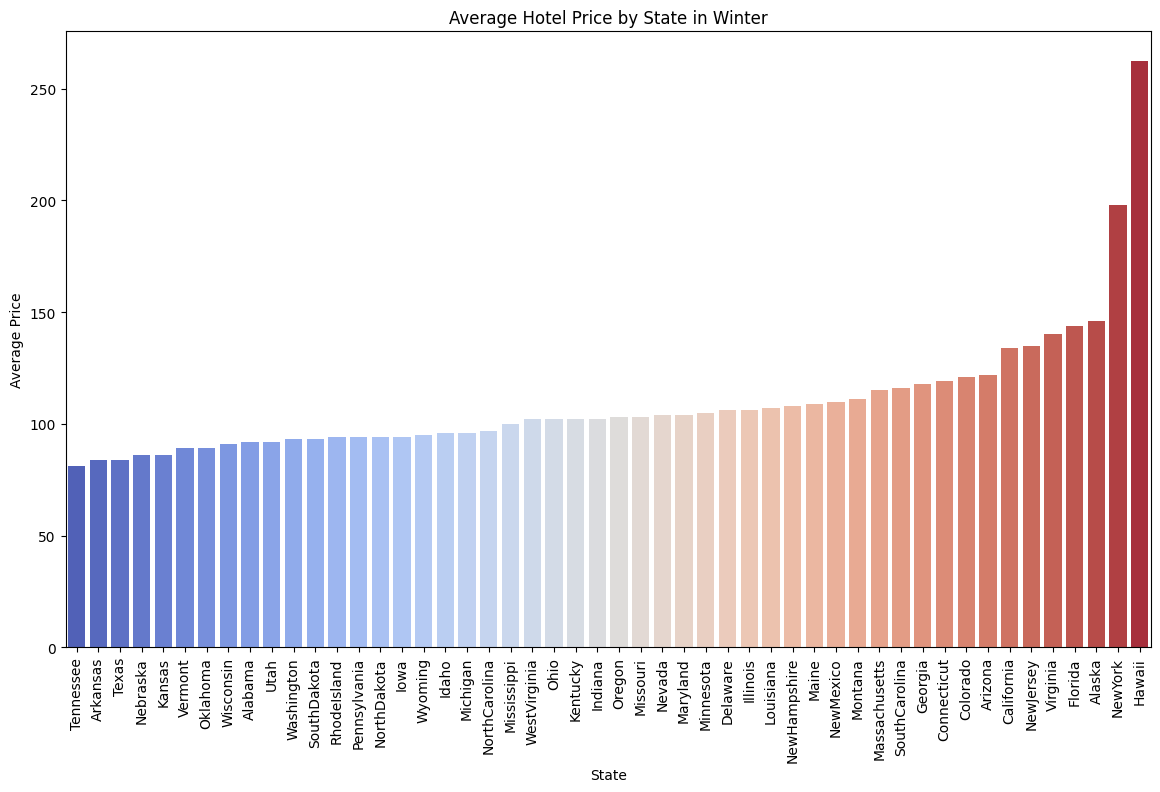

In [10]:
plt.figure(figsize=(14, 8))
avg_price_by_state = data_clean.groupby("state")["price"].median().sort_values().reset_index()
sns.barplot(x="state", y="price", data=avg_price_by_state, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Average Hotel Price by State in Winter")
plt.ylabel("Average Price")
plt.xlabel("State")
plt.show()

The above two plots indicate the cheapest Winter hotels can be found in Tennessee, Arkansas, Texas, Nebraska and Kansas.

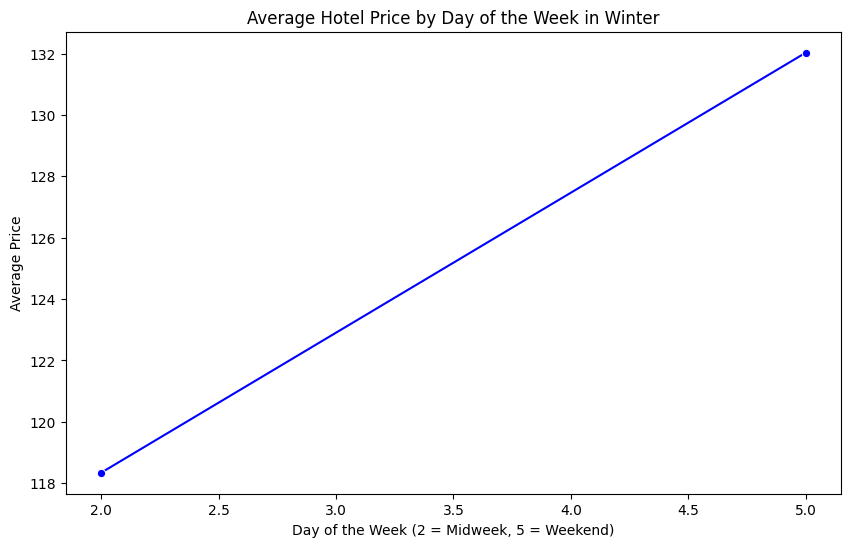

In [11]:
plt.figure(figsize=(10, 6))
avg_price_by_day = data_clean.groupby("day_of_week")["price"].mean().reset_index()
sns.lineplot(x="day_of_week", y="price", data=avg_price_by_day, marker="o", color="b")
plt.title("Average Hotel Price by Day of the Week in Winter")
plt.ylabel("Average Price")
plt.xlabel("Day of the Week (2 = Midweek, 5 = Weekend)")
plt.show()

We see an average jump of about $14 from midweek to the weekend.

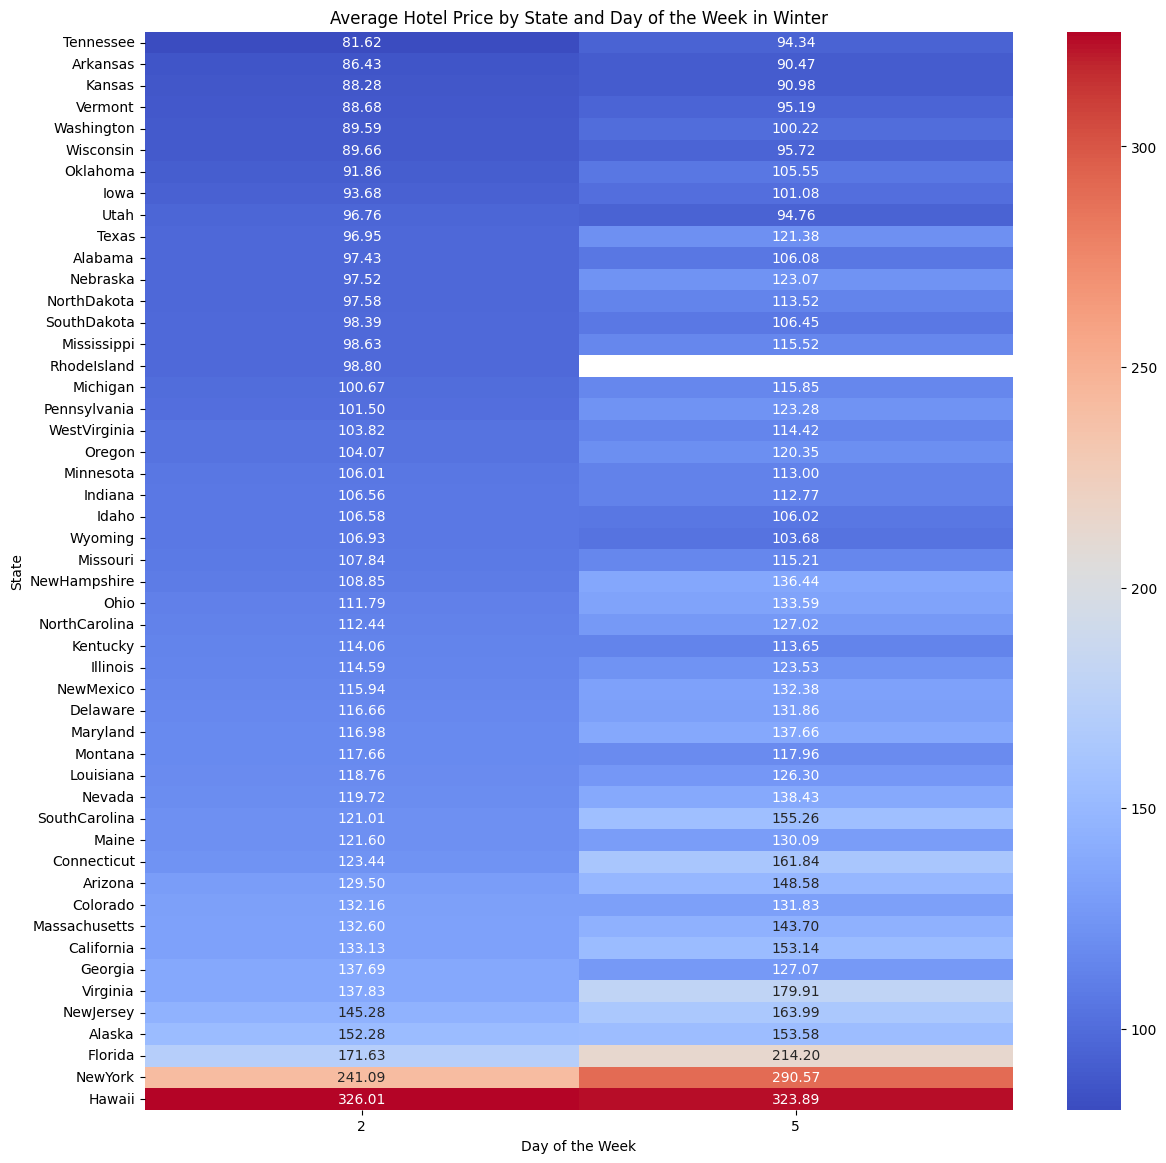

In [12]:
plt.figure(figsize=(14, 14))
avg_price_state_day = (
    data_clean.groupby(["state", "day_of_week"])["price"]
    .mean()
    .unstack()
    .sort_values(by=2, ascending=True)
)
sns.heatmap(avg_price_state_day, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Average Hotel Price by State and Day of the Week in Winter")
plt.ylabel("State")
plt.xlabel("Day of the Week")
plt.show()